In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

                                   *Análise de Crédito*

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv',na_values='na'
)
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Conhecendo a estrutura dos dados

df.shape - retorna uma tupla (qtd linhas, qtd colunas)

In [3]:
df.shape 

(10127, 16)

In [4]:
df[df['default'] == 0].shape

df[df['default'] == 1].shape

qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão clientes adimplentes é de " + \
 f"{round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A proporcão clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )


A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [5]:
df[df['default'] == 0].shape

(8500, 16)

In [6]:
df[df['default'] == 1].shape

(1627, 16)

In [7]:
df.head(n=5)


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [8]:
#Colunas e seus respectivos tipos de dados
df.dtypes


id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [9]:
#Conhecendo os atributos categóricos
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [10]:
#conhecendo os atributos numéricos

df.drop('id', axis=1).select_dtypes('number').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [11]:
#Verificando dados faltantes

df.head()



,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [12]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [13]:
#levantando estatística dos dados faltantes

def stats_dados_faltantes(df: pd.DataFrame) -> None:
 stats_dados_faltantes = []
 for col in df.columns:
    if df[col].isna().any():
       qtd, _ = df[df[col].isna()].shape
       total, _ = df.shape
       dict_dados_faltantes = {col:
       {
        'quantidade': qtd,
        "porcentagem": round(100 * qtd/total, 2)
        }
        }
 stats_dados_faltantes.append(dict_dados_faltantes)
 for stat in stats_dados_faltantes:
   print(stat)

stats_dados_faltantes(df=df)

stats_dados_faltantes(df=df[df['default'] == 0])

stats_dados_faltantes(df=df[df['default'] == 1])


{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


In [14]:
#Transformação e limpeza:
#corrigindo schema:

df[['limite_credito', 'valor_transacoes_12m']].dtypes




limite_credito          object
valor_transacoes_12m    object
dtype: object

In [15]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [16]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = [
 '12.691,51',
 '8.256,96',
 '3.418,56',
 '3.313,03',
 '4.716,22'
]

valores_limpos = list(map(fn, valores_originais))
#print(valores_originais)
print(valores_limpos)

[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [17]:
#Limpando os dados:

#Com a função lambda de limpeza pronta, basta aplica-la nas colunas de interesse.
#Vamos descrever novamente o schema:
#Atributos categóricos.
#Atributos numéricos.
#3.2. Remoção de dados faltantes
#Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é
#trivial.
#Vamos analisar a estrutura dos dados novamente.

valores_limpos = list(map(fn, valores_originais))
print(valores_originais)
print(valores_limpos)





['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [18]:
df['valor_transacoes_12m']

0         1.144,90
1         1.291,45
2         1.887,72
3         1.171,56
4           816,08
           ...    
10122    15.476,26
10123     8.764,88
10124    10.291,78
10125     8.395,62
10126    10.294,96
Name: valor_transacoes_12m, Length: 10127, dtype: object

In [19]:

df['limite_credito']

0        12.691,51
1         8.256,96
2         3.418,56
3         3.313,03
4         4.716,22
           ...    
10122     4.003,91
10123     4.277,04
10124     5.409,16
10125     5.281,84
10126    10.388,80
Name: limite_credito, Length: 10127, dtype: object

In [20]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [21]:
df.select_dtypes('object').describe().transpose()



,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [22]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [23]:
df.dropna(inplace=True)
#Analisando a estrutura novamente
df.shape

df[df['default'] == 0].shape

df[df['default'] == 1].shape

qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de " + \
 f"{round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A nova proporcão de clientes adimplentes é de " + \
 f"{round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%"
 )
print("")
print(f"A proporcão clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )
print(f"A nova proporcão de clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%"
 )


A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


In [24]:
# Dados do Projeto

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 0]

df_inadimplente = df[df['default'] == 1]


A proporcão clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


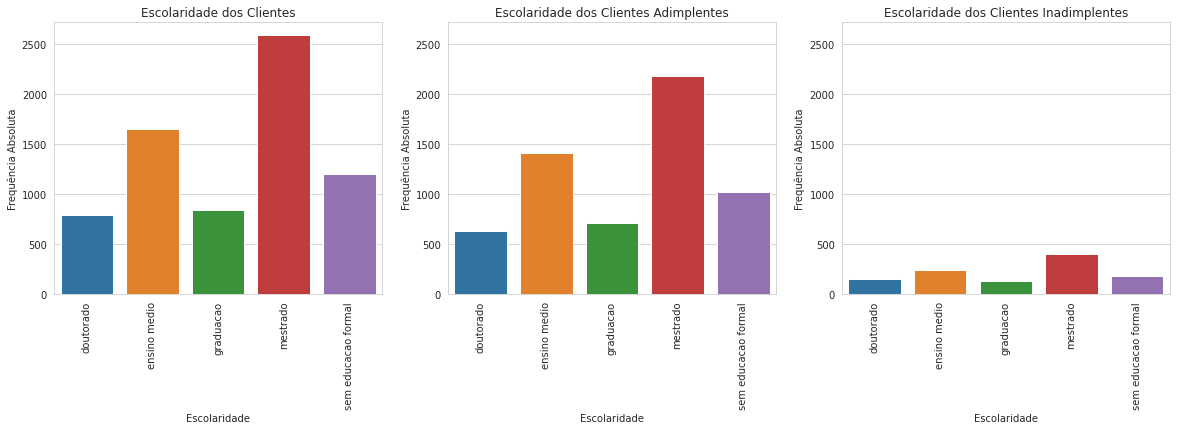

In [25]:
# Visualização categórica 

#Visualizando a relação entre a variável resposta default com os atributos categóricos.

#Escolaridade
print(f"A proporcão clientes adimplentes é de " + \
f"{round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%"
 )

print("")
print(f"A proporcão clientes inadimplentes é de " + \
f"{round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )
print(f"A nova proporcão de clientes inadimplentes é de " + \
f"{round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%"
 )

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 0]

df_inadimplente = df[df['default'] == 1]

df.select_dtypes('object').head(n=5)

coluna = 'escolaridade'
titulos = [
 'Escolaridade dos Clientes',
 'Escolaridade dos Clientes Adimplentes',
 'Escolaridade dos Clientes Inadimplentes'
]
eixo = 0
max_y = 3
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 df_to_plot = dataframe[coluna].value_counts().to_frame()
 df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
 df_to_plot[coluna] = df_to_plot.index
 df_to_plot.sort_values(by=[coluna], inplace=True)
 df_to_plot.sort_values(by=[coluna])
 f = sns.barplot(
 x=df_to_plot[coluna],
 y=df_to_plot['frequencia_absoluta'],
 ax=eixos[eixo]
 )
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

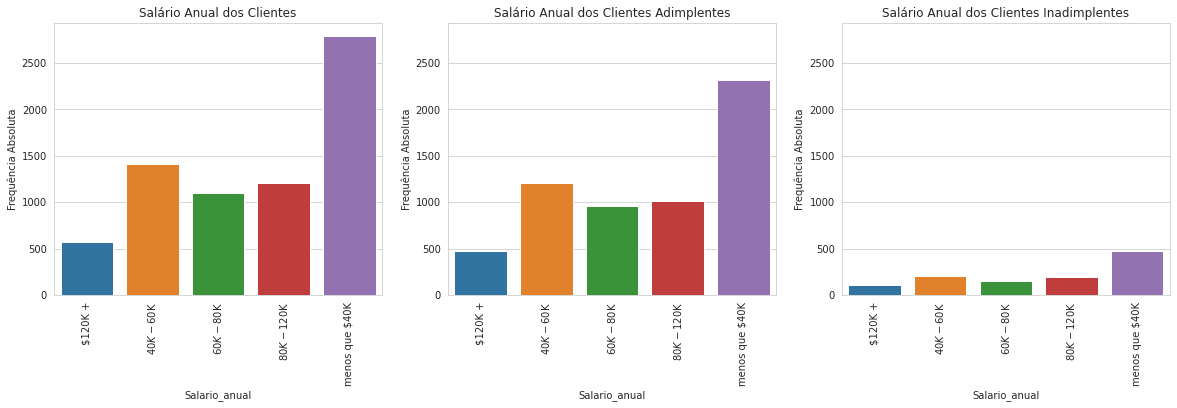

In [26]:
#Salário Anual
coluna = 'salario_anual'
titulos = [
 'Salário Anual dos Clientes',
 'Salário Anual dos Clientes Adimplentes',
 'Salário Anual dos Clientes Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 df_to_plot = dataframe[coluna].value_counts().to_frame()
 df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
 df_to_plot[coluna] = df_to_plot.index
 df_to_plot.reset_index(inplace=True, drop=True)
 df_to_plot.sort_values(by=[coluna], inplace=True)
 f = sns.barplot(
 x=df_to_plot[coluna],
 y=df_to_plot['frequencia_absoluta'],
 ax=eixos[eixo]
 )
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()




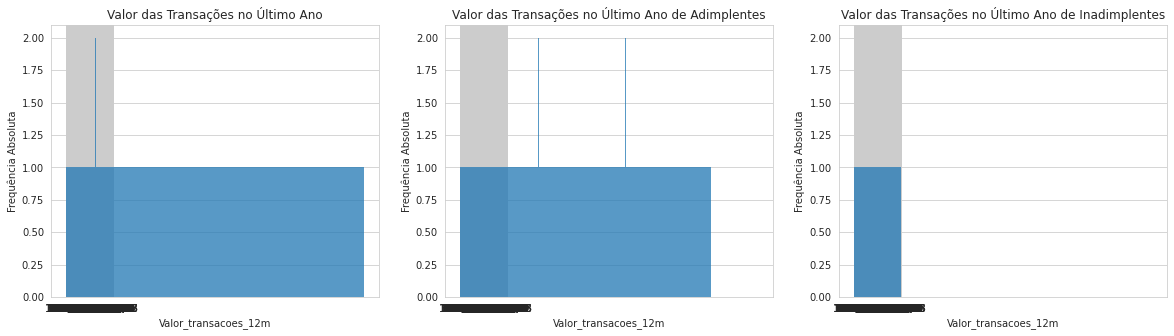

In [33]:
# Visualizações numéricas
#Visualizando a relação entre a variável resposta default com os atributos numéricos:

#Quantidade de Transações nos Últimos 12 Meses:

#Valor das Transações nos Últimos 12 Meses:

coluna = 'valor_transacoes_12m'
titulos = [
 'Valor das Transações no Último Ano',
 'Valor das Transações no Último Ano de Adimplentes',
 'Valor das Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()



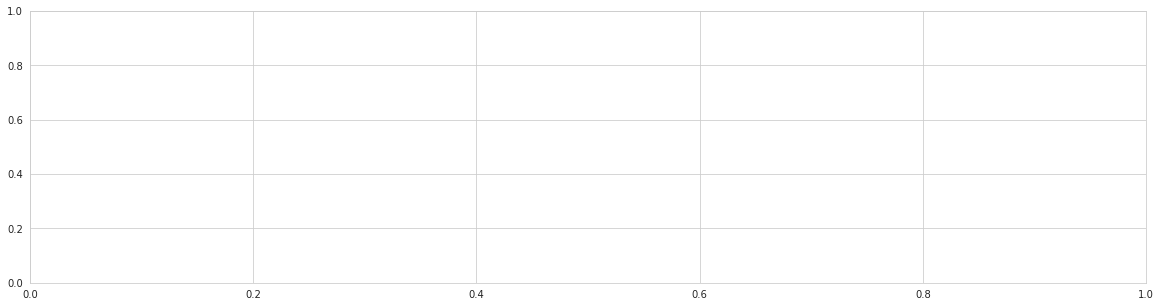

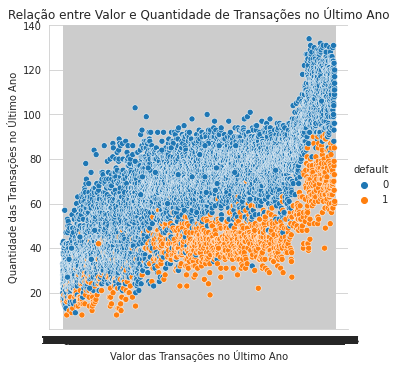

In [34]:
#Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, figsize=(20, 5), sharex=True)
f = sns.relplot(
 x='valor_transacoes_12m',
 y='qtd_transacoes_12m',
 data=df,
 hue='default'
)
_ = f.set(
 title='Relação entre Valor e Quantidade de Transações no Último Ano',
 xlabel='Valor das Transações no Último Ano',
 ylabel='Quantidade das Transações no Último Ano'
 )
figura.show()